(20000, 2)
(20000,)


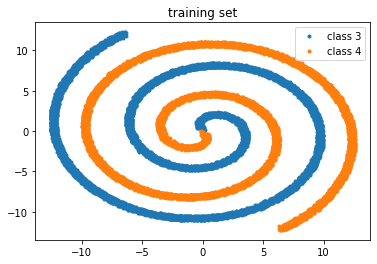

In [2]:
import numpy as np
import matplotlib.pyplot as plt

#Create training dataset
def spirals(n_points, noise=.5):
    n = np.sqrt(np.random.rand(n_points, 1)) * 720 * (2*np.pi)/360
    d1x = -np.cos(n)*n + np.random.rand(n_points, 1) * noise
    d1y = np.sin(n)*n + np.random.rand(n_points, 1) * noise
    return (np.vstack((np.hstack((d1x, d1y)), np.hstack((-d1x, -d1y)))),
            np.hstack((np.zeros(n_points), np.ones(n_points))))


X = np.array(spirals(10000)[0])
Y = np.array(spirals(10000)[1])

spiral_1_x = (X[:10000, 0], X[:10000, 1])
spiral_1_y = (Y[:10000])
spiral_2_x = (X[10000:, 0], X[10000:, 1])
spiral_2_y = (Y[10000:])

#plot training dataset
plt.title('training set')
plt.plot(spiral_1_x[0], spiral_1_x[1], '.', label='class 1')
plt.plot(spiral_2_x[0], spiral_2_x[1], '.', label='class 2')
plt.legend()
plt.show()


Model: "ANN_classifier"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                60        
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 126       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 14        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 3         
Total params: 203
Trainable params: 203
Non-trainable params: 0
_________________________________________________________________
Epoch 1/125
250/250 [==============================] - 0s 1ms/step - loss: 0.3090 - accuracy: 0.5514
Epoch 2/125
250/250 [==============================] - 0s 788us/step - loss: 0.2266 - accuracy: 0.5711
Epoch 3/125
250/250 [===========================

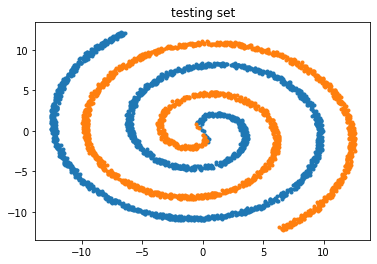

In [3]:
from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.models import load_model

#Create train, test dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42)

#Create classifier
net = Sequential(name='ANN_classifier')
net.add(Dense(20, input_dim=2, activation='tanh'))
net.add(Dense(6, input_dim=2, activation='tanh'))
net.add(Dense(2, input_dim=2, activation='tanh'))
net.add(Dense(1, activation='linear'))
net.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
net.summary()

net.fit(X_train, y_train, epochs=125, batch_size=64)
predicted = net.predict(X_test)

#Create 2 groups for plotting
spiral_1 = np.array([])
spiral_2 = np.array([])

for i in range(len(predicted)):
    if predicted[i] <= 0.5:
        spiral_1 = np.append(spiral_1, X_test[i])
    else:
        spiral_2 = np.append(spiral_2, X_test[i])

spiral_1 = np.reshape(spiral_1, (-1, 2))
spiral_2 = np.reshape(spiral_2, (-1, 2))
plt.title('testing set')
plt.plot(spiral_1[:, np.array([0])],
         spiral_1[:, np.array([1])], '.', label='class 4')
plt.plot(spiral_2[:, np.array([0])],
         spiral_2[:, np.array([1])], '.', label='class 5')


In [10]:
from sklearn.metrics import accuracy_score
score = []
for i in range(len(predicted)):
    if predicted[i] >= 0.5:
        score.append(1)
    else:
        score.append(0)

#Final accuracy
accuracy_score(y_test, score)


0.997